# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Team_2_Healthcare_Insurance_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\Team_2_Healthcare_Insurance_Project'

In [4]:
from pathlib import Path # load the pathlib library

import pandas as pd # load the pandas library
df = pd.read_csv('data/raw/insurance.csv') # read the csv file into a dataframe
df.head() # displays the first first few rows of dataframe
print(df.shape)  # look at shape of dataframe


(1338, 7)


# Section 1

Section 1 content

Import Libraries

In [5]:
import numpy as np # load the numpy library
df.dtypes # check the data types of each column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

---

Listing all the variable 

In [6]:
df.describe(include='all') # get summary statistics of dataframe

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

Check for missing values

In [7]:
#check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

check for duplicates

In [8]:
#check for duplicates
duplicate = df.duplicated().sum()
duplicate

1

Remove Duplicates and checking

In [9]:
#remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

duplicatech = df.duplicated().sum() #check that duplicates are gone
duplicatech

0

Check for NAN

In [10]:
#check for nans
df.isna().sum() #



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no NANs in the data set

Noramlise the data to make sure that all the categories will be consistent


Expect that there are Male and female are recorded corectly for sex and the spellings and spaces are correct
Expect that the regions are spelt consistently and spaces etc are consistent
Expect that the smoking is Yes or no and the spelling are consistent


In [11]:
# check male and female is spelt correctly 
df["sex"] = df["sex"].str.strip().str.lower()


# check region is spelt correctly 
df["region"] = df["region"].str.strip().str.lower() #  can also do this  print(df['region'].unique()) and id all unique don't need to strip


# check smoking is set to yes or no
df["smoker"] = df["smoker"].str.strip().str.lower()






# Values count

In [12]:
# value counts
df["sex"].value_counts()




sex
male      675
female    662
Name: count, dtype: int64

In [13]:
df["region"].value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [14]:
df["smoker"].value_counts()


smoker
no     1063
yes     274
Name: count, dtype: int64

In [15]:
df["children"].value_counts()


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [16]:
df["age"].value_counts()


age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [17]:
df["bmi"].value_counts()


bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

In [18]:
df["charges"].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

Histrogram of all variables to show shapes

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

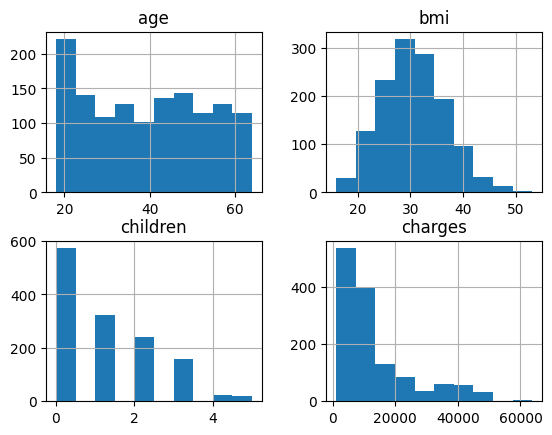

In [19]:
df.hist()

#Summary 

Age is an uniform distribution there is a single peak to the left

BMI has a normal distribution according with some high values greater than 45.

Charges are strongly skewed to the right - most charges appear to be under 15K according to the histrogram

For childrem most people have three or under

In [23]:
## Since 'bmi' is a continuous variable, we can categorize it into groups for better analysis.

bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)
df['bmi_category'].value_counts()


bmi_category
Obesity I        396
Overweight       380
Obesity II       226
Normal weight    221
Obesity III       93
Underweight       21
Name: count, dtype: int64

In [31]:
df['bmi_category'].value_counts().sort_index()

bmi_category
Underweight       21
Normal weight    221
Overweight       380
Obesity I        396
Obesity II       226
Obesity III       93
Name: count, dtype: int64

In [32]:
grouped = df.groupby(['bmi_category', 'smoker'], observed=True)['charges'].mean()
print(grouped)

bmi_category   smoker
Underweight    no         5485.056800
               yes       18809.824980
Normal weight  no         7616.208985
               yes       19942.223641
Overweight     no         8348.367998
               yes       22379.034063
Obesity I      no         8514.353059
               yes       39204.495822
Obesity II     no         9621.299906
               yes       42756.856970
Obesity III    no         8267.556228
               yes       45467.786146
Name: charges, dtype: float64


In [42]:
# Group and calculate mean charges by bmi_category and smoker
pivot = df.groupby(['bmi_category', 'smoker'], observed=True)['charges'].mean().unstack()
	
# 2. Calculate difference and percent difference (numeric)
pivot['difference'] = pivot['yes'] - pivot['no']
pivot['percent_diff'] = (pivot['difference'] / pivot['no']) * 100
	
# 3. Format the currency columns
pivot['no'] = pivot['no'].map(lambda x: f"${x:,.0f}")
pivot['yes'] = pivot['yes'].map(lambda x: f"${x:,.0f}")
pivot['difference'] = pivot['difference'].map(lambda x: f"£{x:,.0f}")

# 4. Format the percent difference column
pivot['percent_diff'] = pivot['percent_diff'].map(lambda x: f"{x:.1f}%")
print(pivot)


smoker             no      yes difference percent_diff
bmi_category                                          
Underweight    $5,485  $18,810    £13,325       242.9%
Normal weight  $7,616  $19,942    £12,326       161.8%
Overweight     $8,348  $22,379    £14,031       168.1%
Obesity I      $8,514  $39,204    £30,690       360.5%
Obesity II     $9,621  $42,757    £33,136       344.4%
Obesity III    $8,268  $45,468    £37,200       450.0%


Focus on 'BMI' and 'Age' as a factor in Healthcare cost

In [43]:
grouped = df.groupby(['bmi_category', 'age'], observed=True)['charges'].mean().reset_index()

grouped['charges'] = grouped['charges'].map(lambda x: f"£{x:,.0f}")

print(grouped)


    bmi_category  age  charges
0    Underweight   18   £7,262
1    Underweight   19   £1,675
2    Underweight   21   £2,876
3    Underweight   23   £2,775
4    Underweight   26   £8,568
..           ...  ...      ...
243  Obesity III   60  £48,674
244  Obesity III   61  £12,819
245  Obesity III   62  £12,983
246  Obesity III   63  £14,480
247  Obesity III   64  £13,831

[248 rows x 3 columns]


Convert from Long to Wide format for better reading and understanding of Dataset

In [41]:
pivot_table = pd.pivot_table(
	    df,
	    values='charges',               # Column to aggregate
	    index='bmi_category',          # Rows
	    columns='age',                 # Columns
	    aggfunc='mean',                # Aggregation function
	    fill_value=0                   # Replace missing values with 0
).reset_index().rename_axis(mapper=None, axis=1)
age_cols = pivot_table.columns.drop('bmi_category')

pivot_table[age_cols] = pivot_table[age_cols].map(lambda x: f"£{x:,.0f}")
print(pivot_table)

    bmi_category      18       19       20      21       22       23       24  \
0    Underweight  £7,262   £1,675       £0  £2,876       £0   £2,775       £0   
1  Normal weight  £4,852   £2,622  £15,742  £4,526   £3,142  £12,642   £8,213   
2     Overweight  £6,206   £8,824   £7,651  £4,563   £2,152   £9,464  £10,140   
3      Obesity I  £7,977  £18,791   £5,009  £7,666   £9,805  £15,914  £11,652   
4     Obesity II  £8,452   £6,896  £27,091  £1,883  £19,473  £10,499   £2,234   
5    Obesity III  £6,903  £20,741   £1,984      £0  £44,501  £15,060  £38,126   

        25      26  ...       55       56       57       58       59       60  \
0       £0  £8,568  ...       £0       £0  £11,535       £0       £0  £13,204   
1   £5,883  £3,104  ...  £10,792  £16,495  £13,809  £11,590  £19,001  £12,820   
2   £7,005  £7,940  ...  £14,258  £13,099  £16,536  £11,966  £14,316  £17,521   
3  £13,045  £7,079  ...  £15,549  £20,011  £16,449  £12,301  £18,212  £34,058   
4   £2,534  £2,323  ...  £2

In [34]:
# Create age bands
def age_band(x):
    if x < 18: return "<18"
    elif x <= 25: return "18-25"
    elif x <= 34: return "26-34"
    elif x <= 49: return "35-49"
    elif x <= 50: return "50-69"
    elif x <= 70: return "70-79"
    return "80+"
df["age_band"] = df["age"].apply(age_band)
df.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

    bmi_category age_band  
0     Overweight    18-25  
1      Obesity I    18-25  
2      Obesity I    26-34  
3  Normal weight    26-34  
4     Overweight    26-34

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

# Push files to Repo

---